Notes:

X-merge Catagorical data

X-Merge continuous Data

X- Extract Seasonality

X-Feature engineering on temperature

X-incorperate temperature feature into dataframe

create Dummy variable for Daylight savings time 
https://stackoverflow.com/questions/52467759/flag-daylight-saving-time-dst-hours-in-pandas-date-time-column
http://pytz.sourceforge.net/#
https://www.youtube.com/watch?v=eirjjyP2qcQ

create variable for holidays using unsupervised learning

create variable for power losses 

Conduct PCA on other Weather data from airports and compair to PHL data

create variable for sunlight

start by creating a dataframe with sunlight and flags for 



In [728]:
import time
import datetime
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly

import scipy.stats as stats
import sklearn
import os
import warnings 
#from fbprophet import Prophet 


pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

warnings.filterwarnings('ignore')



In [729]:
#import the weather data into a dataframe 
weather_data_PHL= pd.read_csv('/Users/robertshiles/CSV_files/weather_data_KPHL.csv')#,encoding= 'latin1')

#import hourly power consumption CSV
power = pd.read_csv('/Users/robertshiles/CSV_files/pjm_hourly_est.csv',encoding= 'latin1')
#weather_data_PHL

### Data Cleaning and Merging 
here we will clean each time series and merge them together into a single pannel 

In [730]:
#create a seperate column for date time to use for merging other data 
power['Datetimecolumn'] = pd.to_datetime(power['Datetime'])

#convert power to date time index and remove all columns except pjme
power['Datetime'] = pd.to_datetime(power['Datetime'])
power = power.drop(['AEP', 'COMED',
                    'DAYTON', 'DEOK',
                    'DOM', 'DUQ', 'EKPC', 'FE', 'NI','PJMW', 'PJM_Load'], axis=1 )
power = power.set_index('Datetime')
#power = power.dropna(subset=['PJME'])
power = power.fillna(0)

#drop all null values for temperature 
# this will remove duplicate weather readings 
weather_data_PHL = weather_data_PHL.dropna(subset=['temp'])
weather_data_PHL = weather_data_PHL.dropna(subset=['pressure'])


#convert weather to date time index
weather_data_PHL['DateTime'] = pd.to_datetime(weather_data_PHL['date/time'])

#drop all excessive weather information 
weather_data_PHL = weather_data_PHL.drop(['expire_time_gmt','valid_time_gmt',
                                          'wx_icon', 'icon_extd',
                                          'qualifier', 'qualifier_svrty',
                                          'blunt_phrase', 'terse_phrase',
                                          'water_temp', 'primary_wave_period',
                                          'primary_wave_height', 'primary_swell_period',
                                          'primary_swell_height', 'primary_swell_direction',
                                          'secondary_swell_period', 'secondary_swell_height',
                                          'secondary_swell_direction', 'time_dif'], axis=1 )

#set the weather to date time 
weather_data_PHL = weather_data_PHL.set_index('DateTime')



In [731]:
#check the power dataframe for null and missing values 
missingpowerdates = pd.date_range(start = power.first_valid_index(), end = power.last_valid_index() ).difference(power.index)
null_powerdates = power['PJME'].loc[power.PJME.isnull() == True].count()
print(missingpowerdates)
print('the number of missing dates is {}'.format(len(missingpowerdates)))
print('the number of null values is {}'.format(null_powerdates))

pivoted = power.pivot_table('PJME', index =power.index.date,columns =power.index.time )
pivoted.count()
# below in the index we can see that there are several missing values between midnight and 4am
#this is due to daylight savings time

DatetimeIndex([], dtype='datetime64[ns]', freq=None)
the number of missing dates is 0
the number of null values is 0


00:00:00    7428
01:00:00    7429
02:00:00    7413
03:00:00    7408
04:00:00    7429
05:00:00    7429
06:00:00    7429
07:00:00    7429
08:00:00    7429
09:00:00    7429
10:00:00    7429
11:00:00    7429
12:00:00    7429
13:00:00    7429
14:00:00    7429
15:00:00    7429
16:00:00    7429
17:00:00    7429
18:00:00    7429
19:00:00    7429
20:00:00    7429
21:00:00    7429
22:00:00    7429
23:00:00    7429
dtype: int64

In [732]:
from numpy.fft import fft, fftfreq, ifft 
Monthly_power = power['PJME']

fft_transform = fft(power['PJME'])
print(fft_transform)


[ 4.66337367e+09+0.00000000e+00j -8.89351526e+08+5.21672053e+08j
 -3.08138533e+08+7.63910059e+08j ...  1.02695692e+08-5.70955482e+08j
 -3.08138533e+08-7.63910059e+08j -8.89351526e+08-5.21672053e+08j]


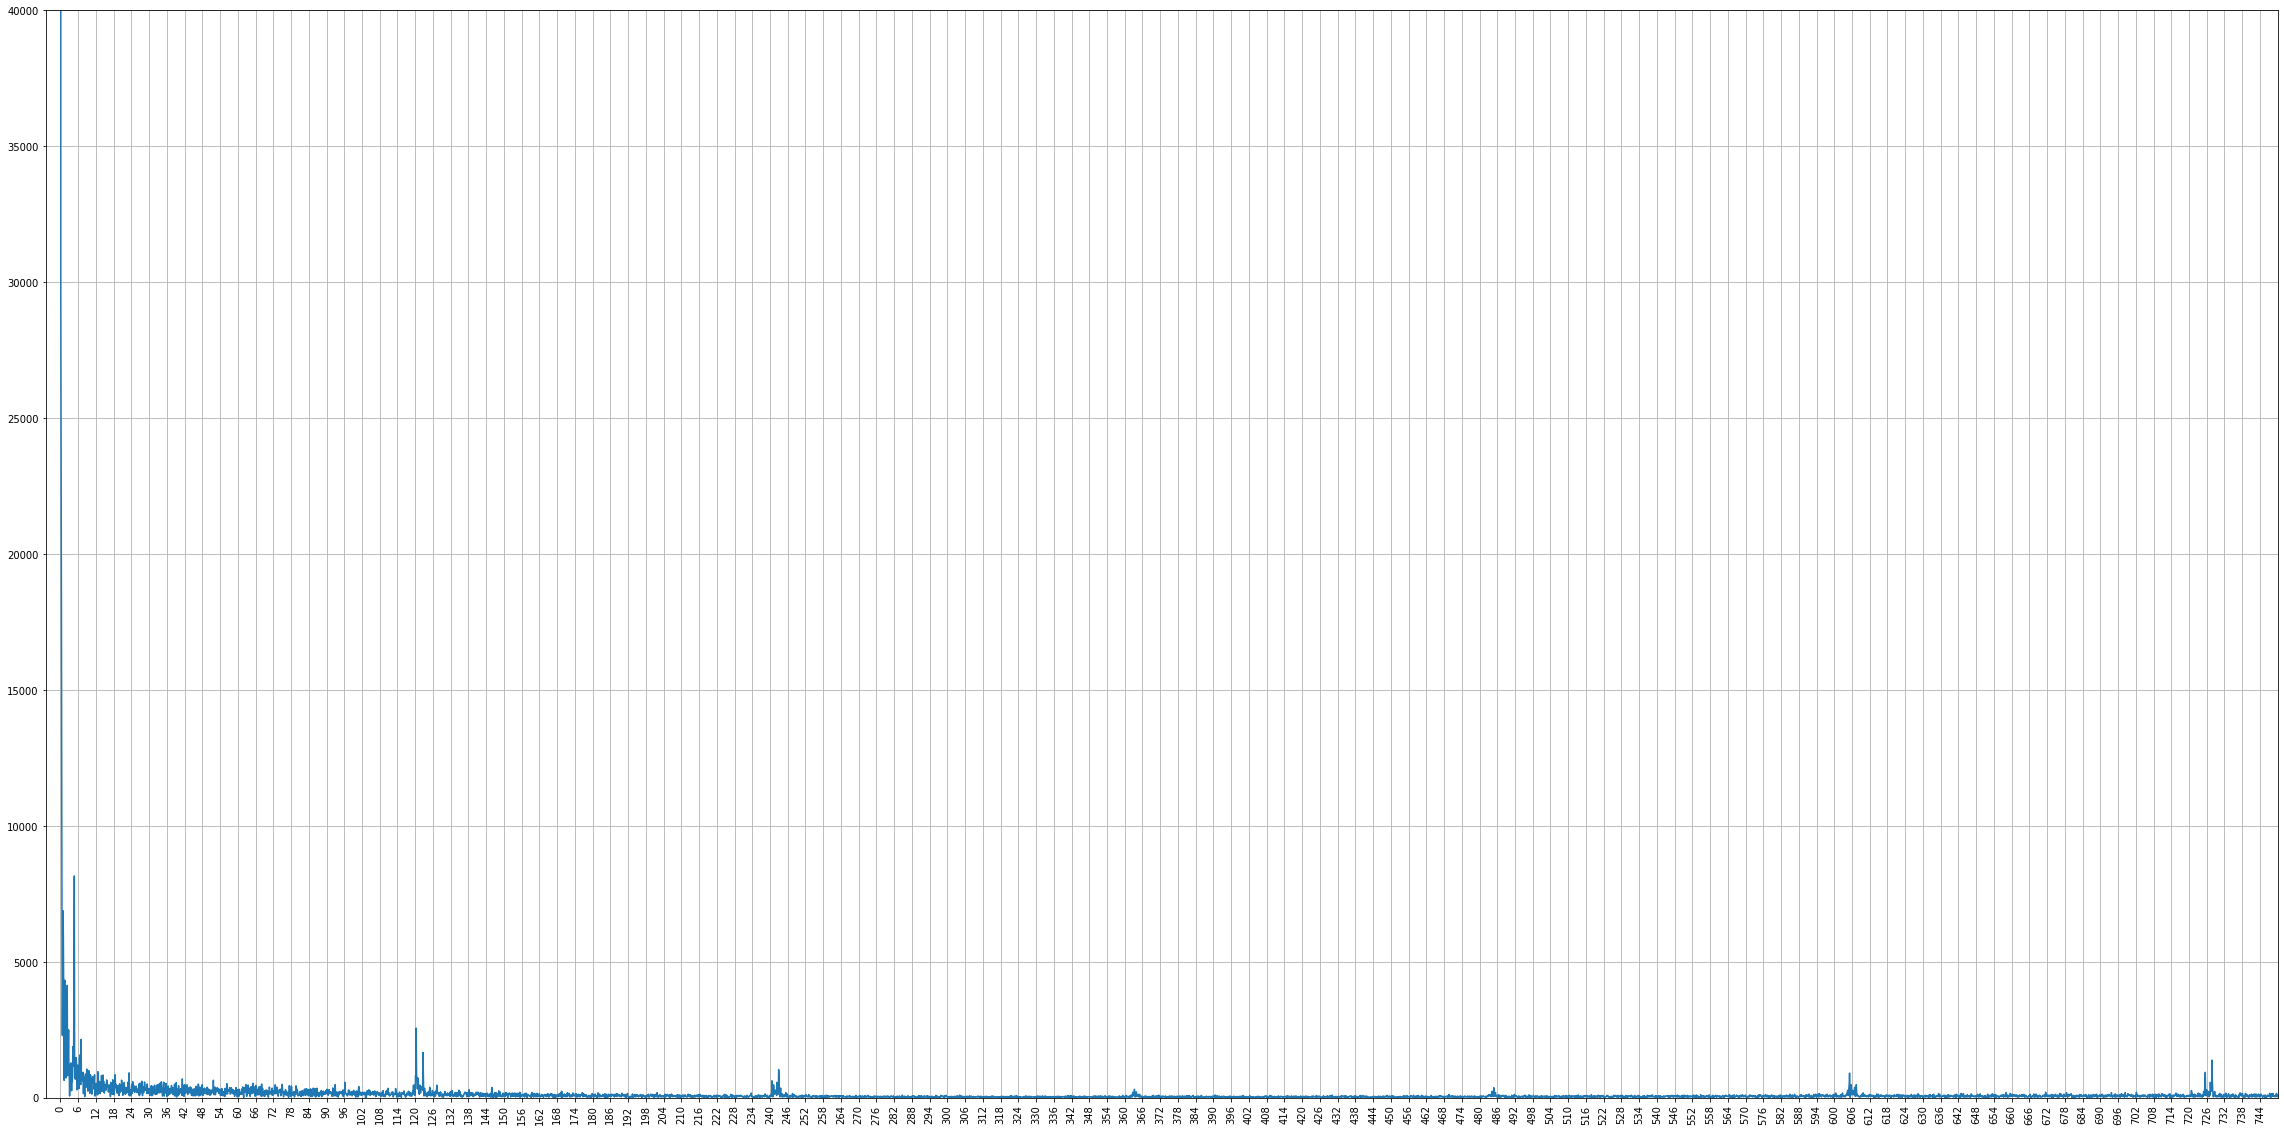

In [733]:
from numpy.fft import fft, fftfreq, ifft 

#from scipy.fft import fft
# Number of sample points
N = 35040
# sample spacing
#T = 1.0 / 20
T = 1.0 / 4000

x = np.linspace(0.0, N*T, N)
#y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(Monthly_power)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20))
#plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.plot(xf, 1.0/N * np.abs(yf[0:N//2]))

#plt.plot(N, yf)

#plt.xlim(1500,2000)
plt.xlim(-5,750)
plt.xticks(np.arange(0, 750, step=6),rotation=90)
plt.ylim(0,40000)

plt.grid()
plt.show()

In [640]:
weather_data_PHL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 228044 entries, 1998-01-01 06:51:00 to 2018-12-01 06:54:00
Data columns (total 29 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   key            228044 non-null  object 
 1   class          228044 non-null  object 
 2   date/time      228044 non-null  object 
 3   obs_id         228044 non-null  object 
 4   obs_name       228044 non-null  object 
 5   day_ind        228044 non-null  object 
 6   temp           228044 non-null  float64
 7   wx_phrase      227997 non-null  object 
 8   pressure_tend  59605 non-null   float64
 9   pressure_desc  59605 non-null   object 
 10  dewPt          225262 non-null  float64
 11  heat_index     225643 non-null  float64
 12  rh             228035 non-null  float64
 13  pressure       228044 non-null  float64
 14  vis            228028 non-null  float64
 15  wc             227618 non-null  float64
 16  wdir           206068 non-null  float64


In [641]:
weather_data_PHL[['wspd',
                  'precip_hrly',
                  'snow_hrly']]=weather_data_PHL[['wspd',
                                                  'precip_hrly',
                                                  'snow_hrly']].fillna(0)
weather_data_PHL[['clds',
                  'wx_phrase']]=weather_data_PHL[['clds',
                                                  'wx_phrase']].fillna('blank')


In [642]:
#extract a list of cloud types from the dataframe
clouds = []
clouds = weather_data_PHL['clds'].unique()
#create a dictionary assigning numbers to each cloud type
clds_nums={}
for i, cloud in enumerate(clouds):
    clds_nums[cloud] = i

#extract a list of weather Phrase types from the dataframe
WX_Phrase = [] 
WX_Phrase = weather_data_PHL['wx_phrase'].unique()
#create a dictionary assigning numbers to each Phrase type
Phrase_nums = {}
for i, Phrase in enumerate(WX_Phrase):
    Phrase_nums[Phrase] = i


weather_data_PHL['clds#']=weather_data_PHL['clds'].apply(lambda x: clds_nums[x])
weather_data_PHL['wx_phrase#']=weather_data_PHL['wx_phrase'].apply(lambda x: Phrase_nums[x])

    
    
print(clouds)    
print(clds_nums) 
print(WX_Phrase)
print(Phrase_nums)

['CLR' 'FEW' 'SCT' 'BKN' 'OVC' 'blank']
{'CLR': 0, 'FEW': 1, 'SCT': 2, 'BKN': 3, 'OVC': 4, 'blank': 5}
['Fair' 'Partly Cloudy' 'Mostly Cloudy' 'Cloudy' 'Mostly Cloudy / Windy'
 'Cloudy / Windy' 'Fair / Windy' 'Partly Cloudy / Windy' 'blank'
 'Light Snow' 'Light Snow / Windy' 'Snow' 'Light Rain' 'Rain' 'Heavy Rain'
 'Fog' 'Haze' 'Light Rain / Windy' 'Light Drizzle' 'Rain / Windy'
 'Rain and Sleet / Windy' 'Thunder' 'Light Rain with Thunder'
 'Haze / Windy' 'T-Storm' 'Heavy T-Storm' 'Thunder in the Vicinity'
 'T-Storm / Windy' 'Heavy T-Storm / Windy' 'Thunder / Windy'
 'Heavy Rain / Windy' 'Rain and Snow' 'Wintry Mix' 'Rain and Sleet'
 'Rain and Snow / Windy' 'Light Sleet' 'Drizzle and Fog'
 'Light Freezing Drizzle' 'Rain / Freezing Rain' 'Snow and Sleet'
 'Heavy Snow' 'Light Snow and Sleet' 'Light Freezing Rain'
 'Light Snow / Freezing Rain' 'Blowing Snow / Windy' 'Sleet'
 'Patches of Fog' 'Light Drizzle / Windy' 'Mist' 'Shallow Fog'
 'Snow / Windy' 'Heavy Snow / Windy' 'Wintry Mix / Wi

https://stackoverflow.com/questions/57569205/python-resampling-and-forward-filling-to-most-recent-month

In [643]:
end=power.PJME.last_valid_index()
start=power.PJME.first_valid_index()
print(end,start)

2018-01-02 00:00:00 2002-12-31 01:00:00


In [644]:
#create an hourly date range the same size as the PJME dataset
# this will be for storing the resampled weather data 
#dates = pd.date_range(start=power.PJME.first_valid_index(),end=power.PJME.last_valid_index(),freq='H')

#New_weather_data_PHL = pd.DataFrame(dates).set_index(dates)
New_weather_data_PHL = pd.DataFrame()

#Resample the weather data for every hour to remove duplicate data points 
New_weather_data_PHL[['temp','pressure','wspd','precip_hrly','snow_hrly']] = weather_data_PHL[['temp','pressure','wspd','precip_hrly','snow_hrly']].resample('H').mean()
New_weather_data_PHL[['clds','wx_phrase']] = weather_data_PHL[['clds','wx_phrase']].resample('H').last()

# interpoplate missing values using slinear interpolation 
New_weather_data_PHL = New_weather_data_PHL.assign(temp=New_weather_data_PHL.temp.interpolate(method='slinear'))
New_weather_data_PHL = New_weather_data_PHL.assign(pressure=New_weather_data_PHL.pressure.interpolate(method='slinear'))
New_weather_data_PHL = New_weather_data_PHL.assign(wspd=New_weather_data_PHL.wspd.interpolate(method='slinear'))
New_weather_data_PHL = New_weather_data_PHL.assign(precip_hrly=New_weather_data_PHL.precip_hrly.interpolate(method='slinear'))
New_weather_data_PHL = New_weather_data_PHL.assign(snow_hrly=New_weather_data_PHL.snow_hrly.interpolate(method='slinear'))





# display the new dataframe 
New_weather_data_PHL.tail()


temp  pressure  wspd  precip_hrly  snow_hrly clds wx_phrase
DateTime                                                                        
2018-12-01 02:00:00  43.0    30.090   7.0          0.0        0.0  OVC    Cloudy
2018-12-01 03:00:00  42.0    30.100   3.0          0.0        0.0  OVC    Cloudy
2018-12-01 04:00:00  42.0    30.105   7.5          0.0        0.0  OVC    Cloudy
2018-12-01 05:00:00  42.5    30.115   7.0          0.0        0.0  OVC    Cloudy
2018-12-01 06:00:00  40.0    30.110   6.0          0.0        0.0  OVC    Cloudy

In [645]:
New_weather_data_PHL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183337 entries, 1998-01-01 06:00:00 to 2018-12-01 06:00:00
Freq: H
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   temp         183337 non-null  float64
 1   pressure     183337 non-null  float64
 2   wspd         183337 non-null  float64
 3   precip_hrly  183337 non-null  float64
 4   snow_hrly    183337 non-null  float64
 5   clds         180901 non-null  object 
 6   wx_phrase    180901 non-null  object 
dtypes: float64(5), object(2)
memory usage: 11.2+ MB


In [646]:
# check for null and missing values in the cleaned weather data 
missingpowerdates = pd.date_range(start = New_weather_data_PHL.first_valid_index(), end = New_weather_data_PHL.last_valid_index() ).difference(New_weather_data_PHL.index)
null_powerdates = New_weather_data_PHL['temp'].loc[New_weather_data_PHL.temp.isnull() == True].count()
print(missingpowerdates)
print('the number of missing dates is {}'.format(len(missingpowerdates)))
print('the number of null values is {}'.format(null_powerdates))

pivoted = New_weather_data_PHL.pivot_table('temp', index =New_weather_data_PHL.index.date,columns =New_weather_data_PHL.index.time )
pivoted.count()

DatetimeIndex([], dtype='datetime64[ns]', freq=None)
the number of missing dates is 0
the number of null values is 0


00:00:00    7639
01:00:00    7639
02:00:00    7639
03:00:00    7639
04:00:00    7639
05:00:00    7639
06:00:00    7640
07:00:00    7639
08:00:00    7639
09:00:00    7639
10:00:00    7639
11:00:00    7639
12:00:00    7639
13:00:00    7639
14:00:00    7639
15:00:00    7639
16:00:00    7639
17:00:00    7639
18:00:00    7639
19:00:00    7639
20:00:00    7639
21:00:00    7639
22:00:00    7639
23:00:00    7639
dtype: int64

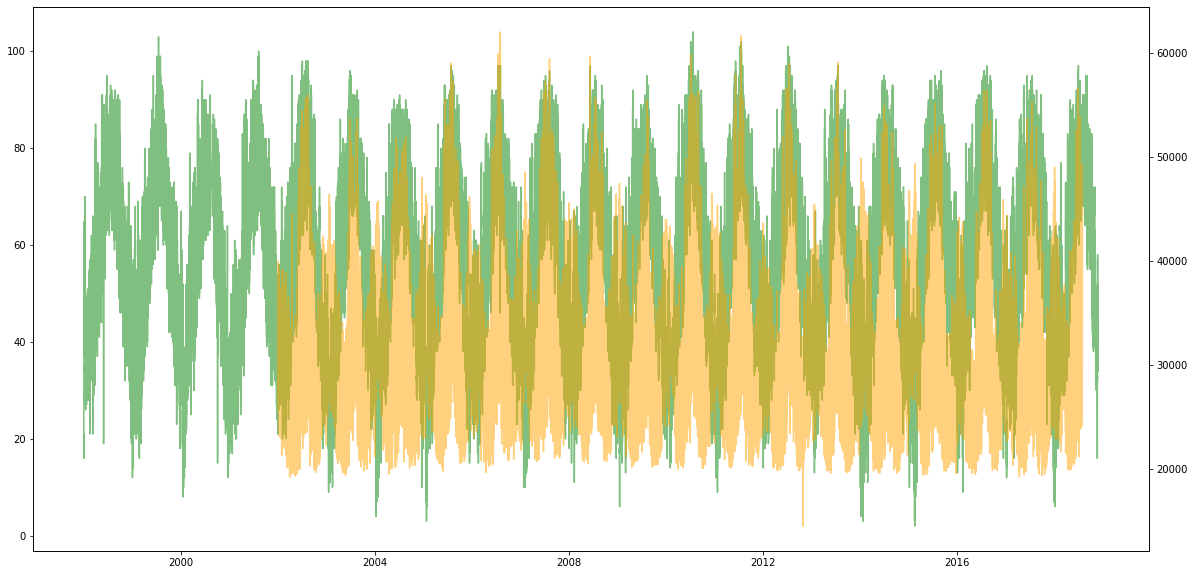

In [647]:
pd.plotting.register_matplotlib_converters()
plt.figure(figsize=(20,10))
plt.plot(weather_data_PHL['temp'],color = 'g', alpha = 0.5)
plt.twinx()  # instantiate a second axes that shares the same x-axis

plt.plot(power['PJME'], color = 'orange', alpha = 0.5)



In [652]:
#power = power.merge(New_weather_data_PHL[['temp','pressure','wspd','precip_hrly','snow_hrly','clds','wx_phrase']],how = 'left',left_on='Datetimecolumn', right_index=True)
power = power.merge(New_weather_data_PHL[['temp','pressure','wspd','precip_hrly','snow_hrly','clds','wx_phrase']],how = 'inner',left_on='Datetimecolumn', right_index=True)

power.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145366 entries, 2002-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PJME            145366 non-null  float64       
 1   Datetimecolumn  145366 non-null  datetime64[ns]
 2   temp            145366 non-null  float64       
 3   pressure        145366 non-null  float64       
 4   wspd            145366 non-null  float64       
 5   precip_hrly     145366 non-null  float64       
 6   snow_hrly       145366 non-null  float64       
 7   clds            144405 non-null  object        
 8   wx_phrase       144405 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 11.1+ MB


In [666]:
#check the power dataframe for null and missing values 
missingpowerdates = pd.date_range(start = power.first_valid_index(), end = power.last_valid_index() ).difference(power.index)
null_powerdates = power['PJME'].loc[power.PJME.isnull() == True].count()
print(missingpowerdates)
print('the number of missing dates is {}'.format(len(missingpowerdates)))
print('the number of null values is {}'.format(null_powerdates))

pivoted = power.pivot_table('PJME', index =power.index.date,columns =power.index.time )
pivoted.count()
# below in the index we can see that there are several missing values between midnight and 4am
#this is due to daylight savings time

DatetimeIndex([], dtype='datetime64[ns]', freq=None)
the number of missing dates is 0
the number of null values is 0


00:00:00    6057
01:00:00    6058
02:00:00    6046
03:00:00    6041
04:00:00    6058
05:00:00    6058
06:00:00    6058
07:00:00    6058
08:00:00    6058
09:00:00    6058
10:00:00    6058
11:00:00    6058
12:00:00    6058
13:00:00    6058
14:00:00    6058
15:00:00    6058
16:00:00    6058
17:00:00    6058
18:00:00    6058
19:00:00    6058
20:00:00    6058
21:00:00    6058
22:00:00    6058
23:00:00    6058
dtype: int64

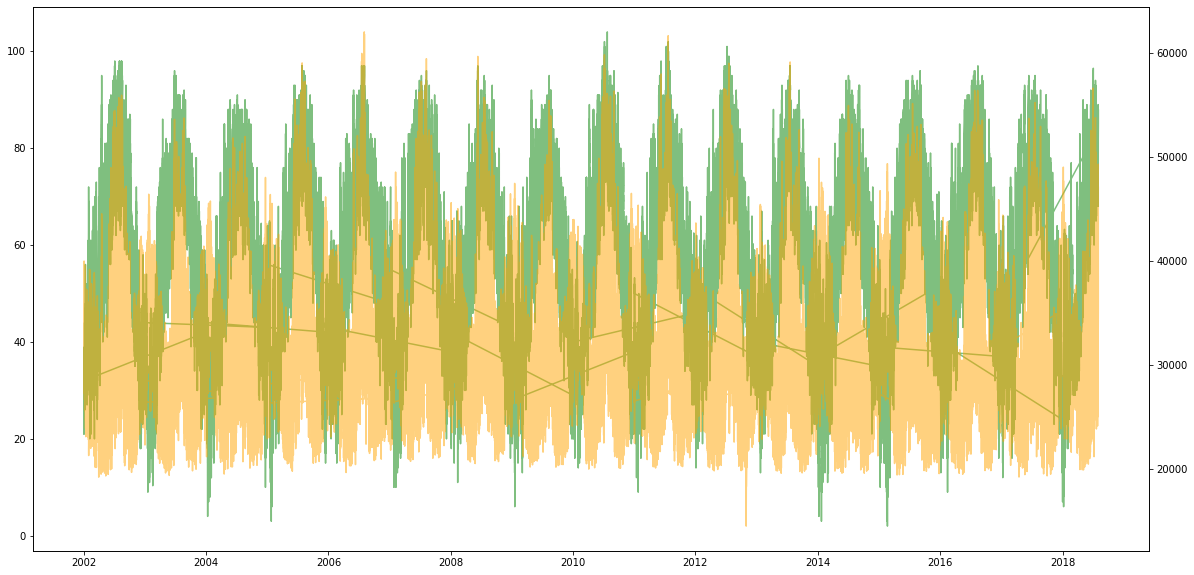

In [653]:
pd.plotting.register_matplotlib_converters()
temp = []
electricity = []
temp = power['temp'].to_list()
electricity = power['PJME'].to_list()

plt.figure(figsize=(20,10))
plt.plot(power.index , power['temp'],color = 'g', alpha = 0.5)
plt.twinx()  # instantiate a second axes that shares the same x-axis

plt.plot(power['PJME'], color = 'orange', alpha = 0.5)

#doesnt recognize hourly data 

In [654]:
power.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145366 entries, 2002-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PJME            145366 non-null  float64       
 1   Datetimecolumn  145366 non-null  datetime64[ns]
 2   temp            145366 non-null  float64       
 3   pressure        145366 non-null  float64       
 4   wspd            145366 non-null  float64       
 5   precip_hrly     145366 non-null  float64       
 6   snow_hrly       145366 non-null  float64       
 7   clds            144405 non-null  object        
 8   wx_phrase       144405 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 11.1+ MB


## Feature Engineering

[-3.91293775e+02 -2.90606696e+00  7.94057037e-02] 47093.03038106909


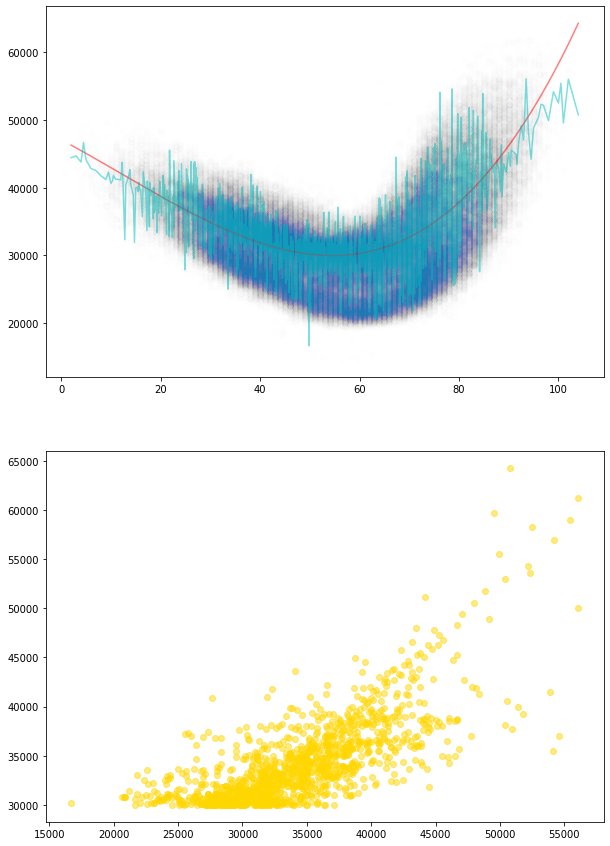

temp  temp_feat      PJME
temp       1.000000   0.359240  0.152625
temp_feat  0.359240   1.000000  0.632578
PJME       0.152625   0.632578  1.000000

In [655]:

#https://towardsdatascience.com/machine-learning-with-python-easy-and-robust-method-to-fit-nonlinear-data-19e8a1ddbd49
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


avg_power =[]
avg_power=power[['PJME','temp']].groupby(power['temp']).mean()
med_power=power[['PJME','temp']].groupby(power['temp']).median()

X = avg_power[['temp']]#,'temp']]#,'temp']]
#X = avg_power['temp']

y = avg_power['PJME'].to_list()



poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly,y)
dir(pol_reg)
intercept = pol_reg.intercept_
score = pol_reg.score
coef = pol_reg.coef_
y_pred = pol_reg.predict(X_poly)
print(coef,intercept)
#print(score)
#dir(pol_reg)
plt.figure(figsize=(10,15))

plt.subplot(2,1,1)

plt.scatter(power['temp'],power['PJME'], alpha = 0.005)
plt.plot(avg_power['temp'],y_pred, color = 'r',alpha = 0.5)

#plt.plot(med_power['temp'],med_power['PJME'],color = 'g', alpha = .5)

plt.plot(avg_power['temp'],avg_power['PJME'],color = 'c', alpha = .5)#

#plt.scatter(power['temp'],y_pred, color = 'c',alpha = 0.5)
plt.subplot(2,1,2)
plt.scatter(avg_power['PJME'],y_pred,color = 'gold', alpha = 0.5)

plt.show()

X_poly = poly.fit_transform(power[['temp']])
power['temp_feat'] = pol_reg.predict(X_poly)
power[['temp','temp_feat','PJME']].corr()


### Unsupervised extraction

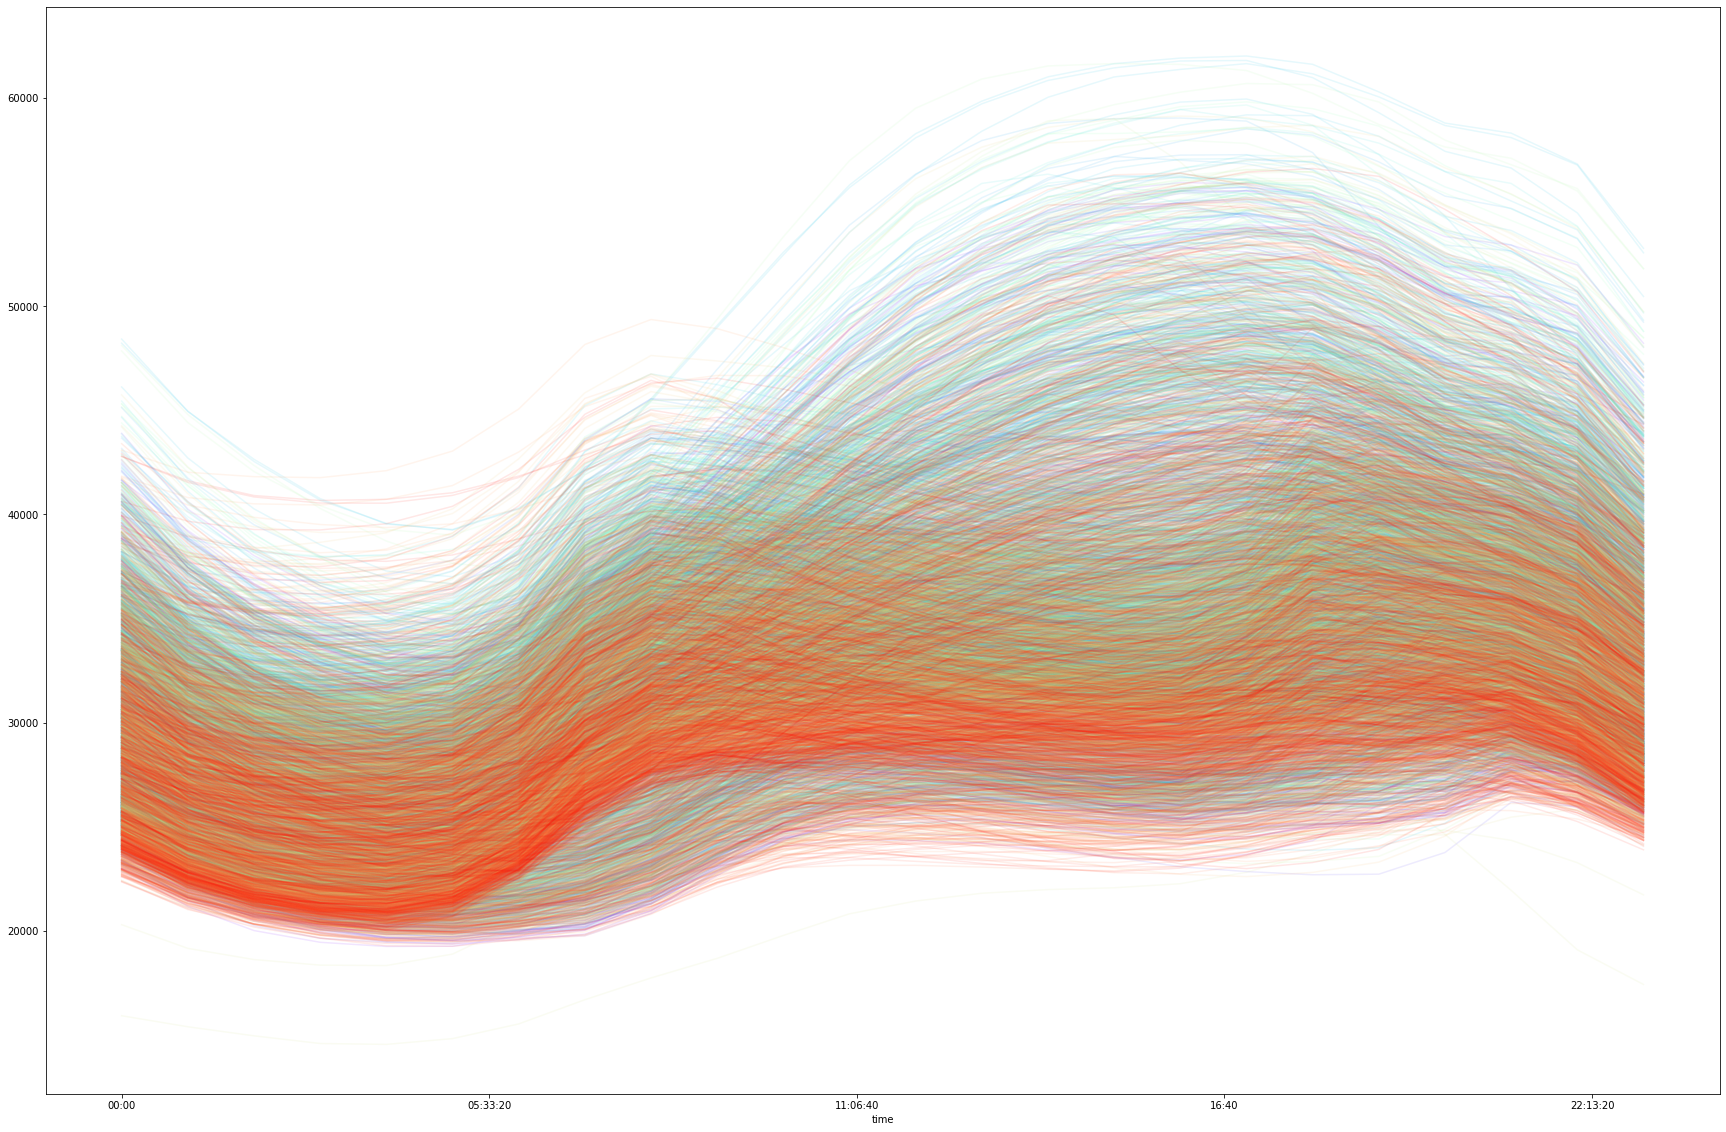

In [692]:
PJME_pivoted = power.pivot_table('PJME', index =power.index.time,columns = power.index.date)
#plt.figure(figsize = (60,40))
Month_of_Year = pd.DatetimeIndex(PJME_pivoted.columns).month
PJME_pivoted.plot(legend = False,c= Month_of_Year, cmap = 'rainbow', alpha=0.1,figsize = (30,20))
plt.show()

In [682]:
X = PJME_pivoted.fillna(0).T.values
X.shape

(6059, 24)

In [683]:
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

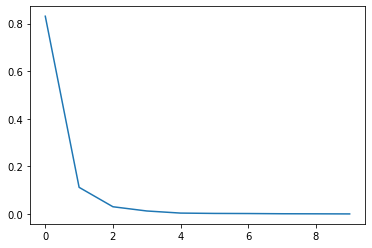

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [8.30834559e-01 1.12287792e-01 3.07414998e-02 1.30065792e-02
 4.12713005e-03 2.73006328e-03 2.28197784e-03 1.37773600e-03
 1.08203126e-03 6.59057068e-04]


 to retain 83.08% of total variance 1 components required
 to retain 94.31% of total variance 2 components required
 to retain 97.39% of total variance 3 components required
 to retain 98.69% of total variance 4 components required
0.9991284253709874


In [684]:
# Dimensionality reduction 
# conduct principle compenent analysis on the data and examine the explained variance of the components
from sklearn.decomposition import PCA

sklearn_pca = PCA(n_components=10)
Y_sklearn = sklearn_pca.fit_transform(X)

pca = sklearn_pca.fit_transform(X_std)

plt.plot(sklearn_pca.explained_variance_ratio_)

plt.show()

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

explained_variance = []
explained_variance = sklearn_pca.explained_variance_ratio_

total_variace = 0
total_variace = 0
components = 0
num_prints = 0
print('\n')
for v in explained_variance:
    total_variace+=v
    components +=1
    
    if total_variace>=0.5 and total_variace<0.7 and num_prints < 1 :
        print(" to retain {}% of total variance  {} components are required".format(round(100*total_variace,2),components))
        num_prints+=1
        
    if total_variace>=0.7 and total_variace<0.8 and num_prints < 2 :
        print(" to retain {}% of total variance {} components required".format(round(100*total_variace,2),components))
        num_prints+=1
        
    elif total_variace>=0.8 and total_variace<0.9 and num_prints < 3 :
        print(" to retain {}% of total variance {} components required".format(round(100*total_variace,2),components))
        num_prints+=1
        
    elif total_variace>=0.9 and num_prints < 4  :
        print(" to retain {}% of total variance {} components required".format(round(100*total_variace,2),components))
        num_prints+=1
        
    else:
        None
        
print(sum(explained_variance))

In [685]:
from sklearn.decomposition import PCA

X2=pd.DataFrame()
X2 = PCA(4,svd_solver='full').fit_transform(X_std)

In [686]:
PJME_pivoted.head()

2002-01-01  2002-01-02  2002-01-03  2002-01-04  2002-01-05  2002-01-06  2002-01-07  2002-01-08  2002-01-09  2002-01-10  2002-01-11  2002-01-12  2002-01-13  2002-01-14  2002-01-15  2002-01-16  2002-01-17  2002-01-18  2002-01-19  2002-01-20  2002-01-21  2002-01-22  2002-01-23  2002-01-24  2002-01-25  2002-01-26  2002-01-27  2002-01-28  2002-01-29  2002-01-30  2002-01-31  2002-02-01  2002-02-02  2002-02-03  2002-02-04  2002-02-05  2002-02-06  2002-02-07  2002-02-08  2002-02-09  2002-02-10  2002-02-11  2002-02-12  2002-02-13  2002-02-14  2002-02-15  2002-02-16  2002-02-17  2002-02-18  2002-02-19  2002-02-20  2002-02-21  2002-02-22  2002-02-23  2002-02-24  2002-02-25  2002-02-26  2002-02-27  2002-02-28  2002-03-01  2002-03-02  2002-03-03  2002-03-04  2002-03-05  2002-03-06  2002-03-07  2002-03-08  2002-03-09  2002-03-10  2002-03-11  2002-03-12  2002-03-13  2002-03-14  2002-03-15  2002-03-16  2002-03-17  2002-03-18  2002-03-19  2002-03-20  2002-03-21  2002-03-22  2002-03-23  \
00:00:00         NaN     29563.0     31451.0     31038.0     30924.0     29011.0     28337.0     31187.0     30943.0     29096.0     27252.0     28222.0     26803.0     27659.0     27483.0     28211.0     28849.0     28634.0     30189.0     29587.0     28368.0     28657.0     28436.0     27106.0     26591.0     28240.0     26425.0     24868.0     26074.0     24743.0     25332.0     26903.0     27237.0     28206.0     27366.0     31734.0     30572.0     28720.0     29284.0     28572.0     26442.0     24646.0     30412.0     28344.0     30560.0     29865.0     27196.0     25396.0     28431.0     28615.0     26635.0     25617.0     25925.0     27165.0     27185.0     26075.0     26137.0     25851.0     30375.0     29584.0     27961.0     25693.0     25775.0     31635.0     29781.0     26810.0     25547.0     24581.0     23338.0     27564.0     28109.0     26483.0     26515.0     24822.0     24042.0     24299.0     26338.0     27080.0     26811.0     26884.0     28061.0     30371.0   
01:00:00     30393.0     28121.0     29414.0     29338.0     28635.0     27100.0     26862.0     29445.0     29082.0     27144.0     25364.0     26248.0     25052.0     26059.0     25643.0     26530.0     26984.0     26991.0     28412.0     27980.0     27160.0     26850.0     26624.0     25248.0     24631.0     26557.0     25056.0     23668.0     24084.0     22868.0     23559.0     24846.0     25656.0     26710.0     25950.0     30260.0     28943.0     26782.0     27457.0     27163.0     24771.0     23046.0     28681.0     26429.0     28862.0     28309.0     25243.0     23893.0     26858.0     27125.0     24800.0     23724.0     24195.0     25464.0     25676.0     24745.0     24677.0     24195.0     28797.0     28135.0     26243.0     23910.0     24705.0     30169.0     28068.0     24990.0     23967.0     22917.0     21598.0     26091.0     26578.0     24815.0     24771.0     23114.0     22265.0     23144.0     24818.0     25282.0     25124.0     25285.0     26972.0     28642.0   
02:00:00     29265.0     27437.0     28537.0     28421.0     27501.0     26097.0     25976.0     28670.0     28154.0     26163.0     24433.0     25198.0     24007.0     25487.0     24967.0     25750.0     26135.0     26036.0     27385.0     26895.0     26516.0     25847.0     25582.0     24278.0     23768.0     25585.0     24169.0     23061.0     23207.0     21932.0     22734.0     23905.0     24867.0     25799.0     25134.0     29729.0     28157.0     25924.0     26552.0     24833.0     23906.0     22286.0     27904.0     25705.0     28180.0     27354.0     24250.0     22974.0     26346.0     26484.0     24012.0     22799.0     23123.0     24548.0     25019.0     24250.0     23875.0     23490.0     28259.0     27420.0     25597.0     22688.0     24311.0     29559.0     27206.0     24114.0     23247.0     22452.0     20671.0     25615.0     25860.0     24055.0     23887.0     22144.0     21189.0     22169.0     24161.0     24429.0     24263.0     24446.0     26605.0     27701.0   
03:00:00     28357.0     2

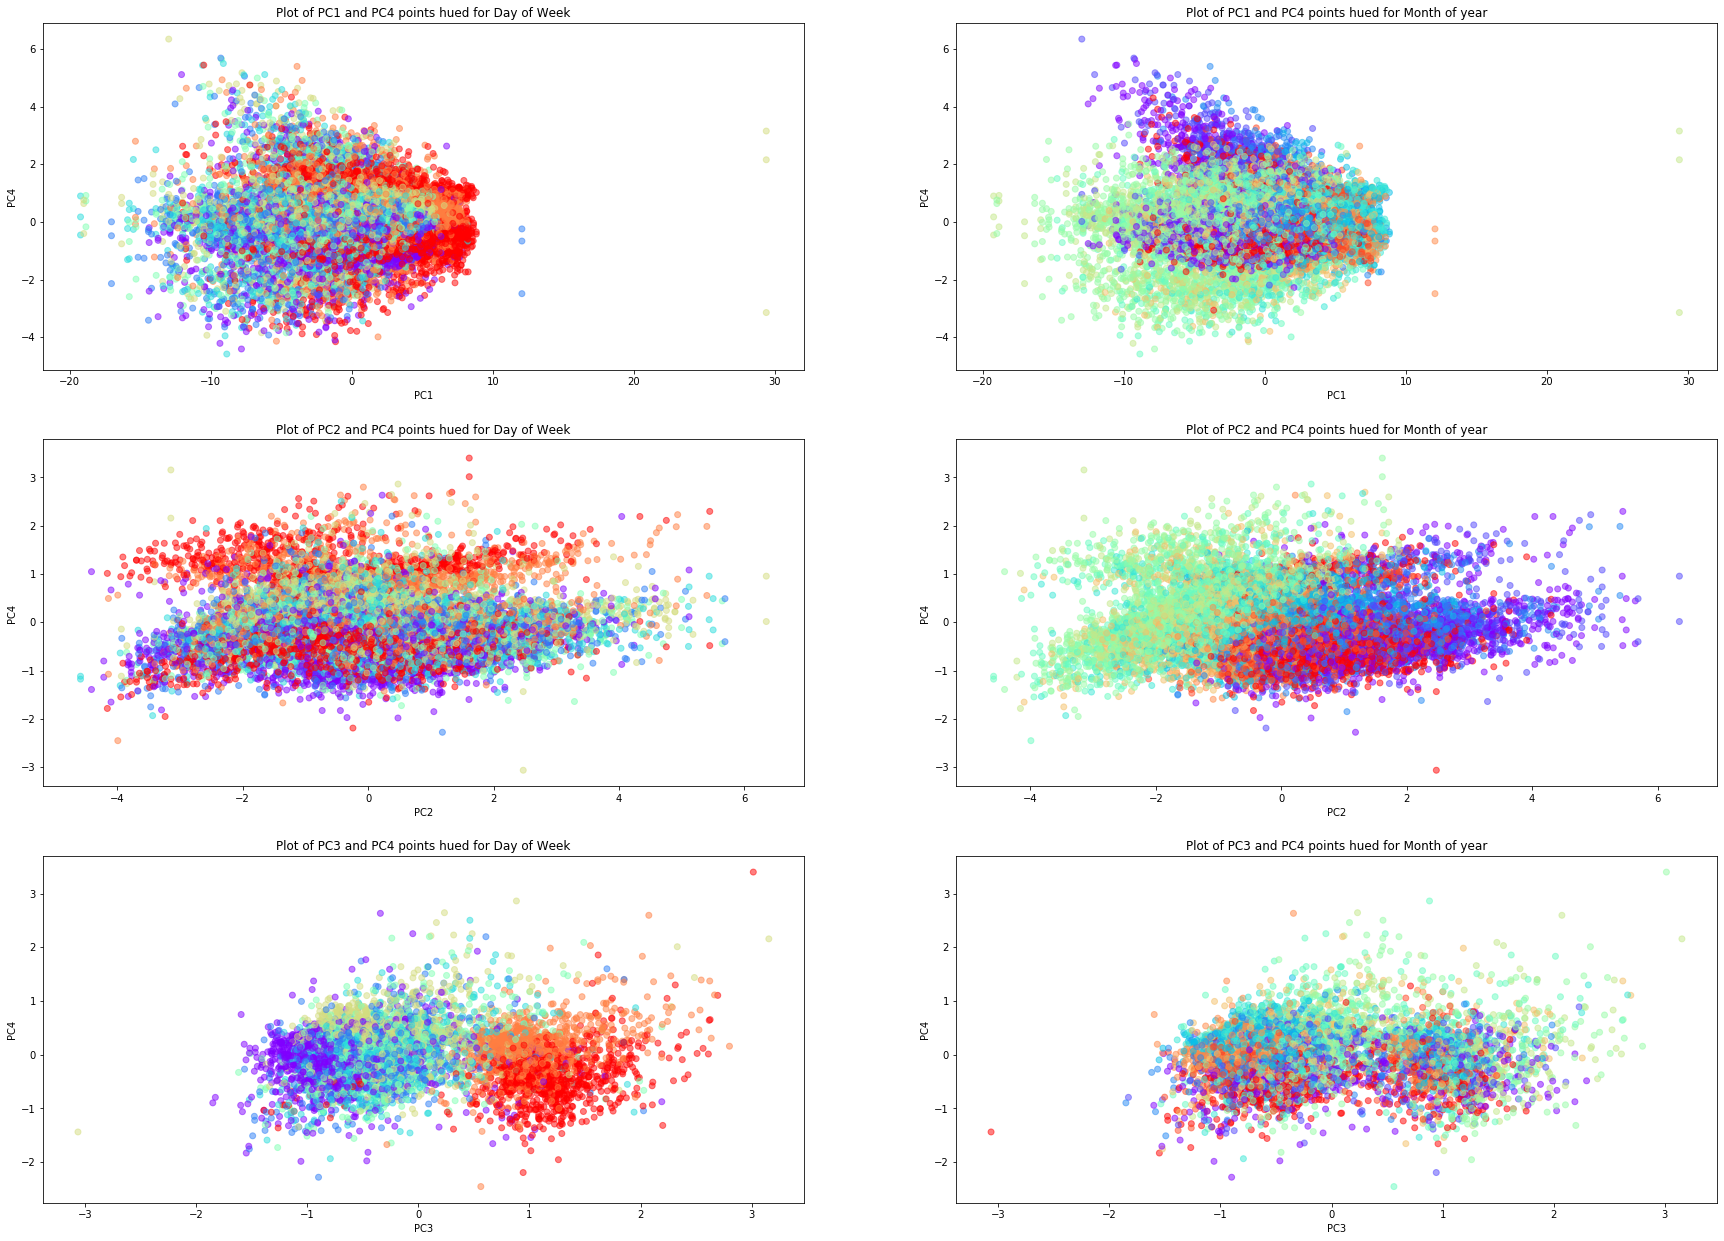

In [705]:
xplot = X2[:,0]
yplot = X2[:,1]
zplot = X2[:,2]
aplot = X2[:,3]

day_of_week = pd.DatetimeIndex(PJME_pivoted.columns).dayofweek
Month_of_Year = pd.DatetimeIndex(PJME_pivoted.columns).month

plt.figure(figsize=[30,60])
p=0
for i in np.arange(0,4,1):
        for j in np.arange((i+1),4,1):
            p=(i+1)*2
            plt.subplot(8,2,p-1)
            plt.scatter(X2[:,i],X2[:,j],c=day_of_week,cmap='rainbow',alpha = 0.5)
            plt.xlabel('PC{}'.format(str(i+1)))
            plt.ylabel('PC{}'.format(str(j+1)))
            plt.title('Plot of PC{} and PC{} points hued for Day of Week'.format(str(i+1),str(j+1)))

            plt.subplot(8,2,p)
            plt.scatter(X2[:,i],X2[:,j],c=Month_of_Year,cmap='rainbow',alpha = 0.5)
            plt.xlabel('PC{}'.format(str(i+1)))
            plt.ylabel('PC{}'.format(str(j+1)))
            plt.title('Plot of PC{} and PC{} points hued for Month of year'.format(str(i+1),str(j+1)))


plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

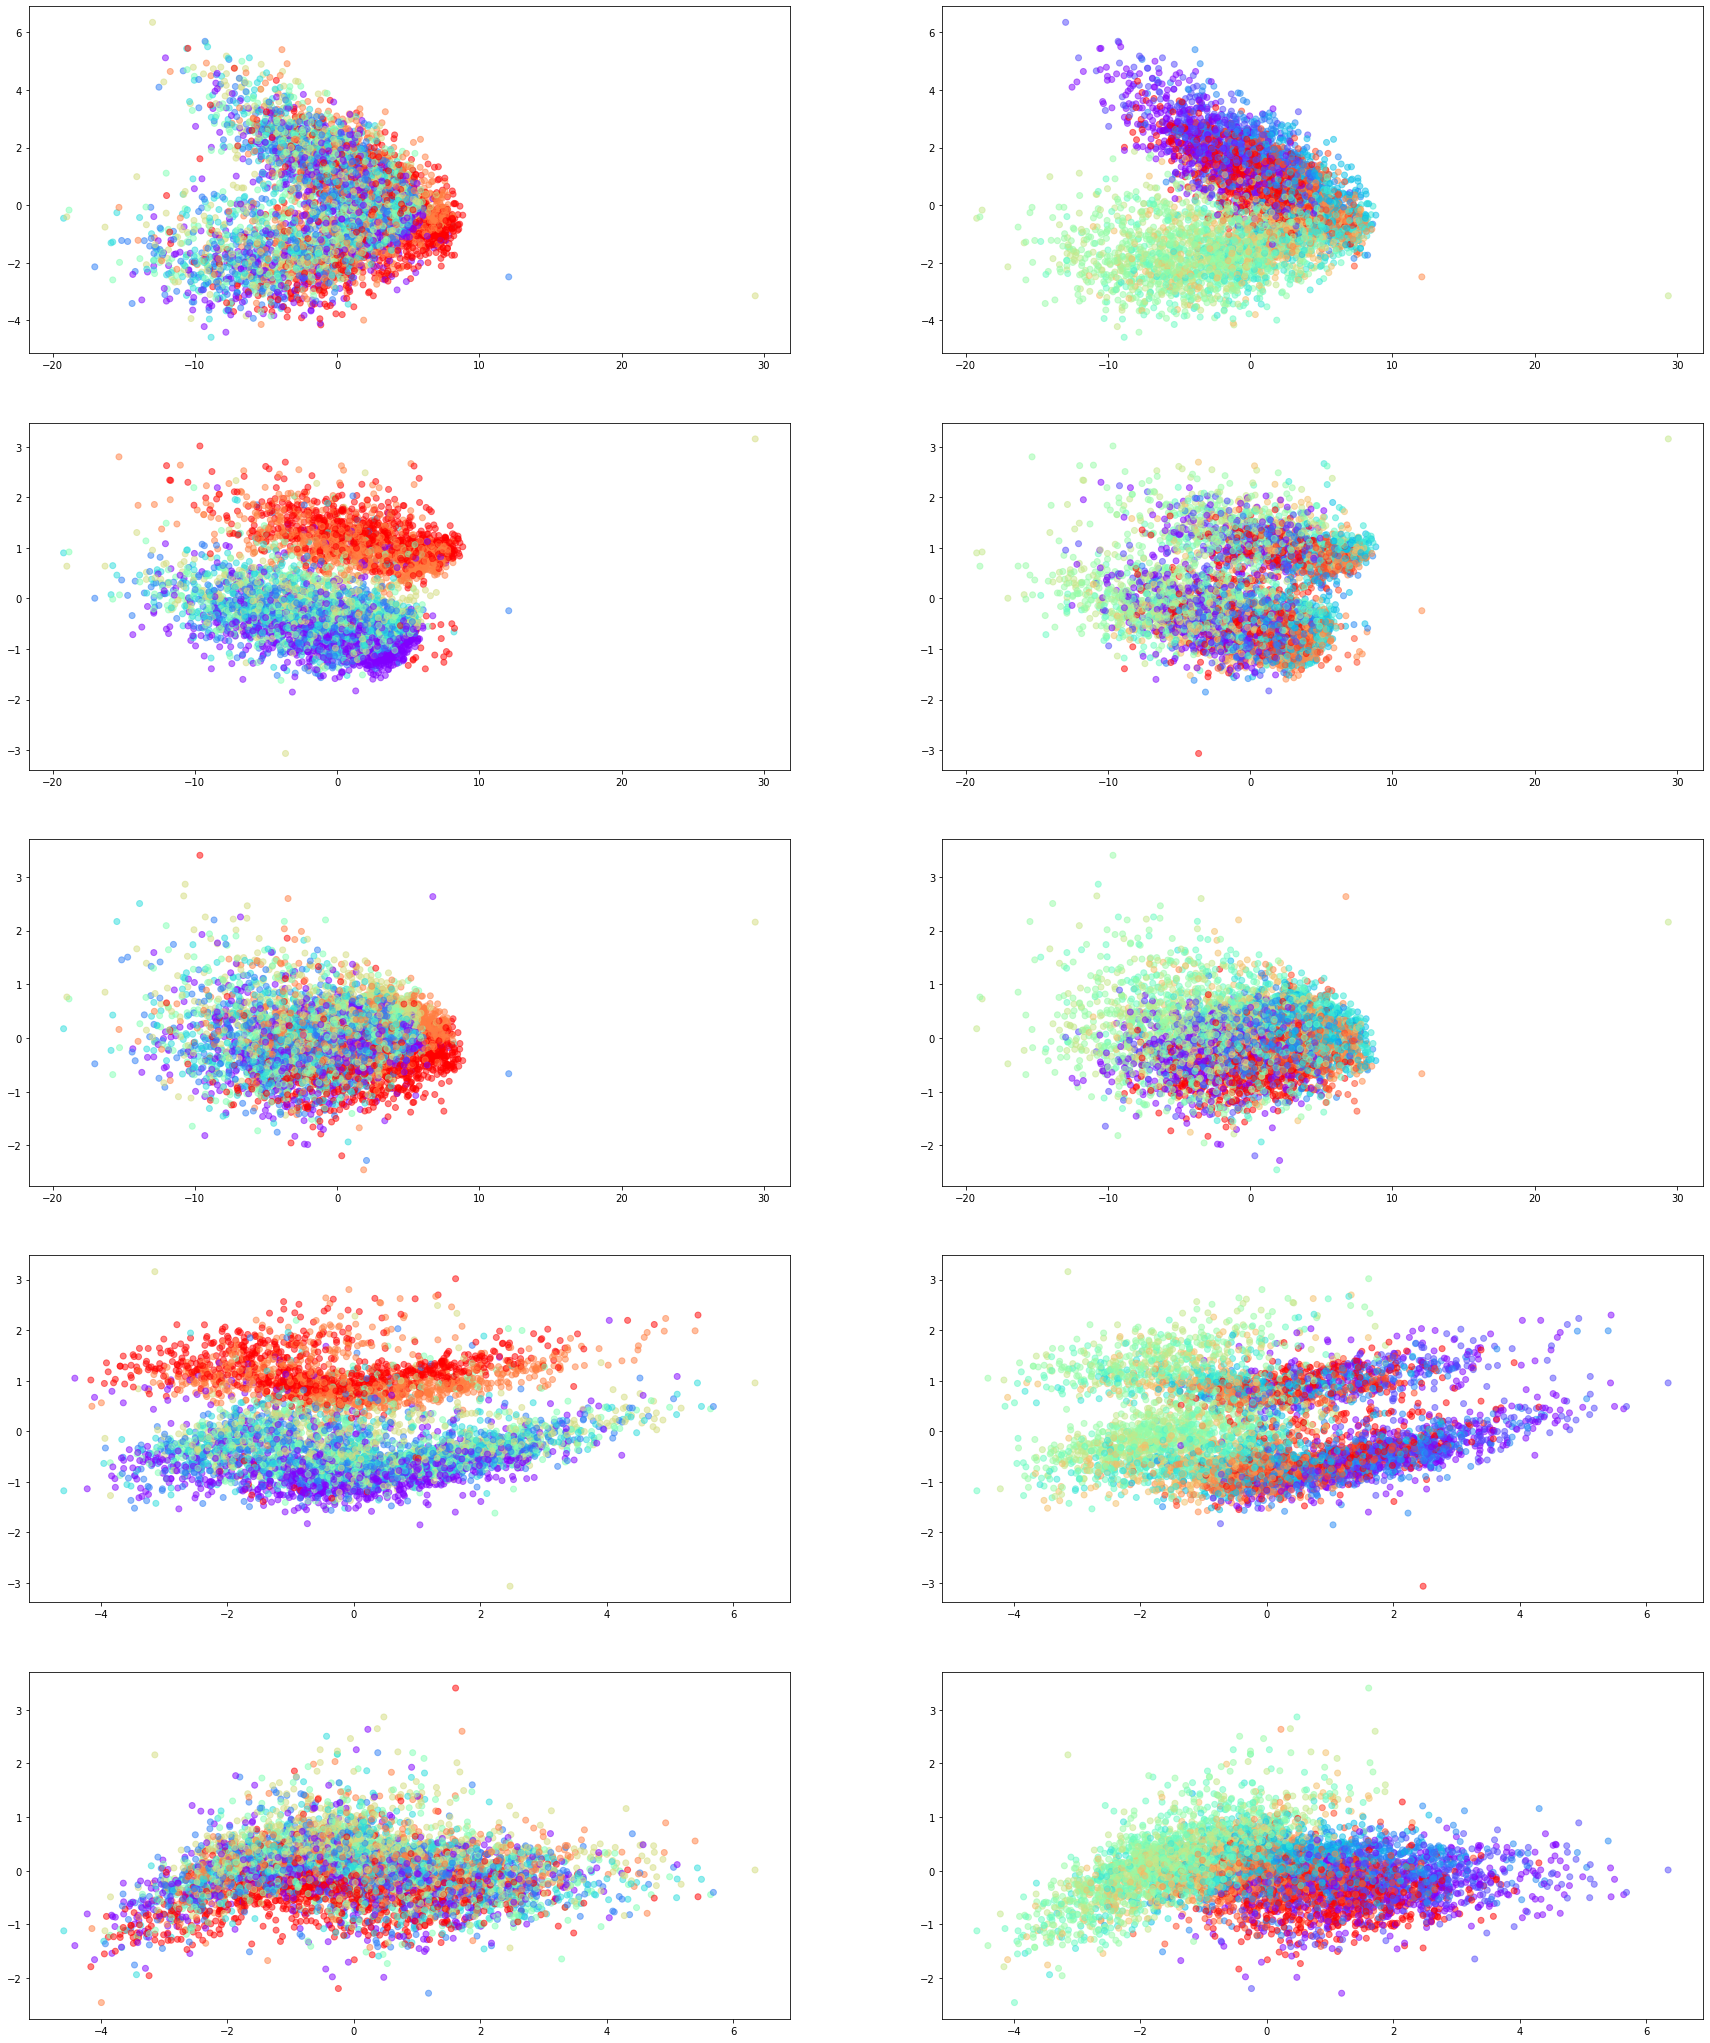

In [698]:
day_of_week = pd.DatetimeIndex(PJME_pivoted.columns).dayofweek
Month_of_Year = pd.DatetimeIndex(PJME_pivoted.columns).month

plt.figure(figsize=[30,60])
plt.subplot(8,2,1)
plt.scatter(X2[:,0],X2[:,1],c=day_of_week,cmap='rainbow',alpha = 0.5)

plt.subplot(8,2,2)
plt.scatter(X2[:,0],X2[:,1],c=Month_of_Year,cmap='rainbow',alpha = 0.5)

plt.subplot(8,2,3)
plt.scatter(X2[:,0],X2[:,2],c=day_of_week,cmap='rainbow',alpha = 0.5)

plt.subplot(8,2,4)
plt.scatter(X2[:,0],X2[:,2],c=Month_of_Year,cmap='rainbow',alpha = 0.5)

plt.subplot(8,2,5)
plt.scatter(X2[:,0],X2[:,3],c=day_of_week,cmap='rainbow',alpha = 0.5)

plt.subplot(8,2,6)
plt.scatter(X2[:,0],X2[:,3],c=Month_of_Year,cmap='rainbow',alpha = 0.5)

plt.subplot(8,2,7)
plt.scatter(X2[:,1],X2[:,2],c=day_of_week,cmap='rainbow',alpha = 0.5)

plt.subplot(8,2,8)
plt.scatter(X2[:,1],X2[:,2],c=Month_of_Year,cmap='rainbow',alpha = 0.5)

plt.subplot(8,2,9)
plt.scatter(X2[:,1],X2[:,3],c=day_of_week,cmap='rainbow',alpha = 0.5)

plt.subplot(8,2,10)
plt.scatter(X2[:,1],X2[:,3],c=Month_of_Year,cmap='rainbow',alpha = 0.5)

plt.show


fast Forier Transformation 

In [701]:
from numpy.fft import fft, fftfreq, ifft 
#Monthly_power = power['total']

fft_transform = fft(power['PJME'])
print(fft_transform)


[ 4.66337367e+09+4.32482921e-08j -3.70141625e+07-4.97783763e+07j
 -1.39460306e+07+6.28263643e+06j ... -1.35811368e+07-1.32367945e+07j
 -1.39460306e+07-6.28263643e+06j -3.70141625e+07+4.97783763e+07j]


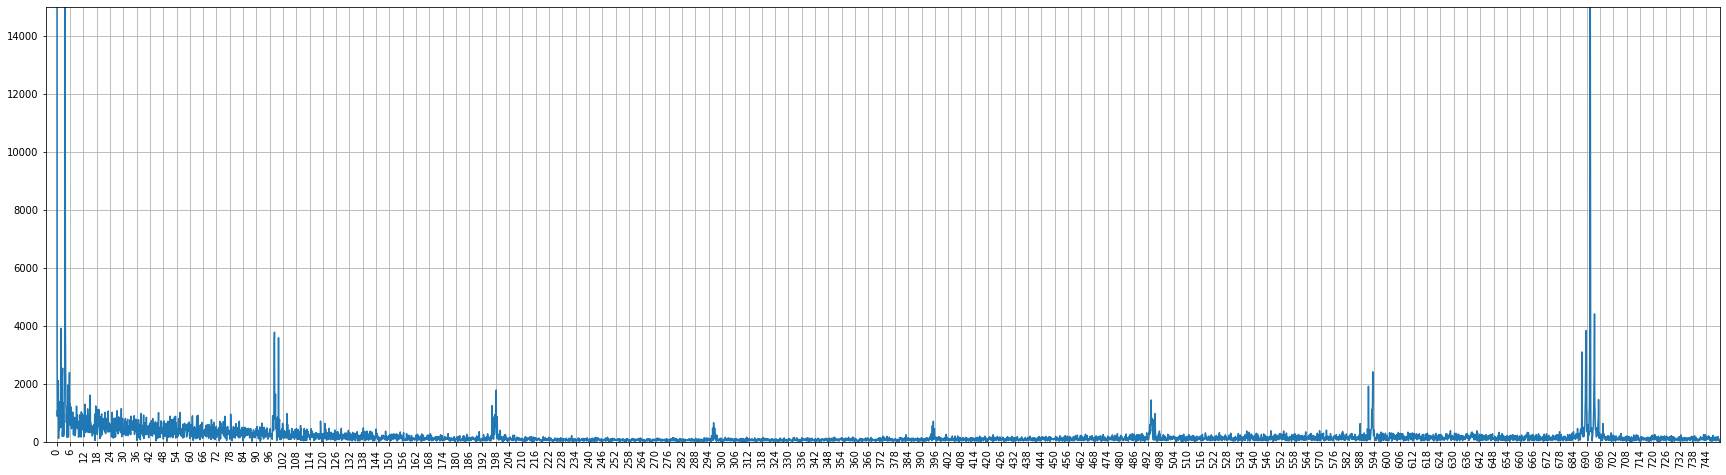

In [709]:
from numpy.fft import fft, fftfreq, ifft 

#from scipy.fft import fft
# Number of sample points
N = 35040
# sample spacing
#T = 1.0 / 20
T = 1.0 / 4000

x = np.linspace(0.0, N*T, N)
#y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft_transform
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
#plt.plot(xf, 1.0/N * np.abs(yf[0:N//2]))

#plt.plot(N, yf)

#plt.xlim(1500,2000)
plt.xlim(-5,750)
plt.xticks(np.arange(0, 750, step=6),rotation=90)
plt.ylim(0,15000)

plt.grid()
plt.show()

In [663]:
#create an array of the PJME values
elect = []
elect = power['PJME'].dropna().tolist()

#create an array of temperature values
temp = []
temp = power['temp_feat'].dropna().tolist()
print(len(elect))

145366


Text(0.5, 1.0, 'MA(1) PACF')

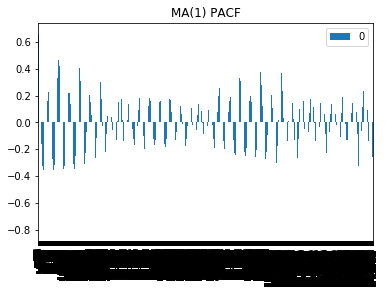

In [568]:
from statsmodels.tsa.stattools import ccf

cross_corr_func = pd.DataFrame(ccf(elect, temp, unbiased=True))

#x_acf = pd.DataFrame(pacf(x_ma))
cross_corr_func.plot(kind='bar')
plt.title('MA(1) PACF')


Text(0.5, 1.0, 'Corelation Lag between electricity and the Temperature Feature')

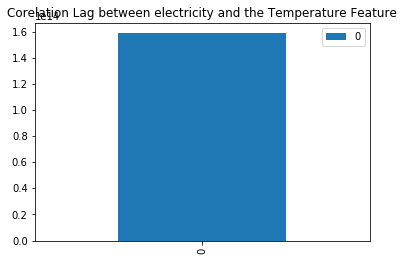

In [572]:
from scipy.signal import correlate

corr = pd.DataFrame(correlate(temp,elect, mode='valid',method='fft') )
#method='auto',or 'fft'
corr.plot(kind='bar')
plt.title("Corelation Lag between electricity and the Temperature Feature")

In [435]:
print(corr)

                   0
0       1.287080e+11
1       1.288947e+11
2       1.290807e+11
3       1.292516e+11
4       1.293963e+11
...              ...
145361  1.352552e+11
145362  1.354294e+11
145363  1.356155e+11
145364  1.358058e+11
145365  1.359901e+11

[145366 rows x 1 columns]


In [558]:
#create an array of the PJME values
elect = []
elect = power['PJME'].dropna().tolist()

#create an array of temperature values
temp = []
temp = power['temp_feat'].dropna().tolist()
print(len(elect))

145366


In [664]:
from statsmodels.tsa.seasonal import seasonal_decompose
train = elect
#train = power['total']
result_elect = seasonal_decompose(elect,model = 'additive', freq = (168))

result_temp = seasonal_decompose(temp,model = 'additive', freq = (168))

#result = seasonal_decompose(train,model = 'multiplicative', freq = (8766))
#resultweekly = seasonal_decompose(train,model = 'additive', freq = (168))



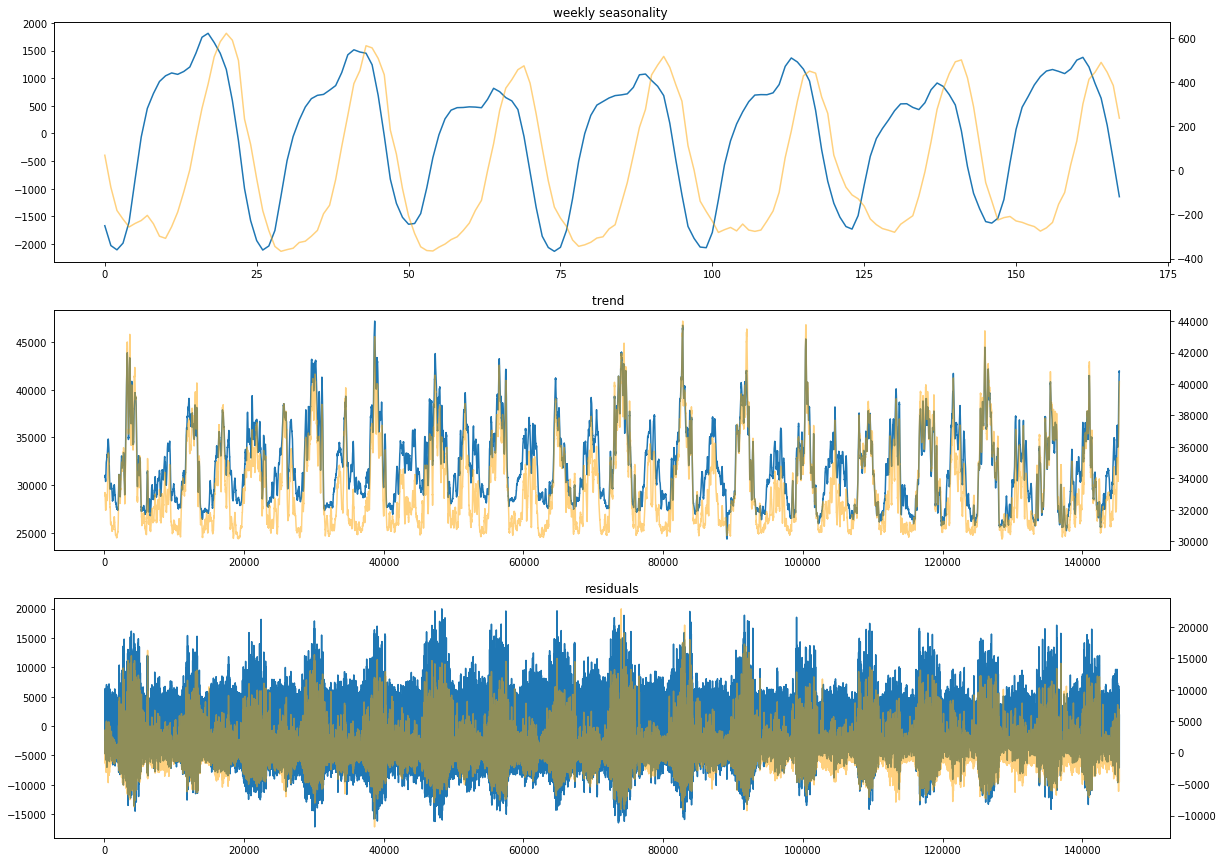

In [665]:
plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
plt.plot(result_elect.seasonal[0:168])
plt.title('weekly seasonality ')
plt.twinx()  # instantiate a second axes that shares the same x-axis
plt.plot(result_temp.seasonal[0:168], color = 'orange',alpha =.5)

plt.subplot(3,1,2)
plt.plot(result_elect.trend)
plt.title('trend  ')
plt.twinx()  # instantiate a second axes that shares the same x-axis
plt.plot(result_temp.trend, color = 'orange',alpha =.5)

plt.subplot(3,1,3)
plt.plot(result_elect.resid)
plt.title('residuals')
plt.twinx()  # instantiate a second axes that shares the same x-axis
plt.plot(result_temp.resid, color = 'orange',alpha =.5)

plt.show()

## Modeling: VAR, Pannel OLS, Dynamic Time Warping KNN, LSTM